# Summary of classification models
1. softmax
2. support vector machine
3. Kneighbors time series classifier
3. rocket time series classification

In [1]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

sns.set_theme(style="whitegrid")
output_dir = Path("/work/data/interim")
DATA_ROOT = Path('/work/data/alldata/')
datalist = np.array([x for x in DATA_ROOT.iterdir()])

<AxesSubplot:xlabel='mouse type', ylabel='accuracy'>

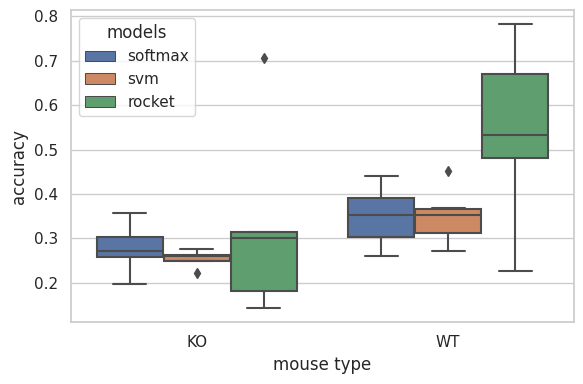

In [2]:
files_path = [
    ("softmax_regression", "softmax", "sm_train_without_normalization.pickle"),
    ("support-vector-machine", "svm","svm_sigmoid_kernel.pickle"),
    # ("time_series_classification", "k_neighbors","tsc_train_kneighbors.pickle"),
    ("time_series_classification", "rocket","tsc_train_rocket.pickle")
]

fig, ax = plt.subplots(figsize=(6, 4), tight_layout = True, sharey=True)

out = []
for m_id, data_dir in enumerate(datalist):
    data_name = str(data_dir).split('/')[-1]
    for dir, method, file_path in files_path:
        with open(output_dir/dir/data_name/file_path,"rb") as f:
            results = pickle.load(f)
        accu = np.sum((results["y_test"]==results["y_pred"]))/len(results["y_pred"])
        if "KO" in data_name:
            out.append([accu, "KO", method])
        else:
            out.append([accu, "WT", method])

out = pd.DataFrame(out, columns=["accuracy", "mouse type", "models"])

sns.boxplot(y="accuracy", x="mouse type", hue="models", data=out, ax=ax)

# mobility = results["mobility"] # Inverse of mobilityularization strength
# ax.set_title(f"{mobility:.2f} cm/s")
# plt.suptitle("the effect of regularization strength")


## Accuracy Median

In [3]:
out.groupby(["models","mouse type"]).median()

accuracy
models  mouse type          
rocket  KO          0.300000
        WT          0.533333
softmax KO          0.271667
        WT          0.353070
svm     KO          0.259868
        WT          0.351562